In [15]:
!pip install tensorflow

In [16]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.19.0


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
dataset=pd.read_csv('/content/sample_data/Churn_Modelling.csv')

In [27]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [30]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [31]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [32]:
##Feature engineering
geography=pd.get_dummies(X['Geography'],dtype=int,drop_first=True)
gender=pd.get_dummies(X['Gender'],dtype=int,drop_first=True)

In [33]:
geography


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [34]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [35]:
#concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [36]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [37]:
X=pd.concat([X,geography,gender],axis=1)

In [38]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [39]:
#Splotting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [41]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [42]:
X_train.shape

(8000, 11)

In [43]:
##part 2 now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [44]:
#lets initialize the ANN
classifier=Sequential()

In [59]:
#adding the input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.2))

In [60]:
#adding 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))


In [61]:
#adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [62]:
#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [63]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [65]:
#early stopping
import tensorflow as tf
from tensorflow import keras
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [66]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7991 - loss: 0.5875 - val_accuracy: 0.7955 - val_loss: 0.5008
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7963 - loss: 0.4899 - val_accuracy: 0.7955 - val_loss: 0.4643
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7921 - loss: 0.4733 - val_accuracy: 0.7955 - val_loss: 0.4502
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7979 - loss: 0.4504 - val_accuracy: 0.7955 - val_loss: 0.4468
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7955 - loss: 0.4497 - val_accuracy: 0.7955 - val_loss: 0.4433
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7991 - loss: 0.4371 - val_accuracy: 0.8228 - val_loss: 0.4417
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8219 - loss: 0.4432 - val_accuracy: 0.8251 - val_loss: 0.4387
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8287 - loss: 0.4332 - 

In [67]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

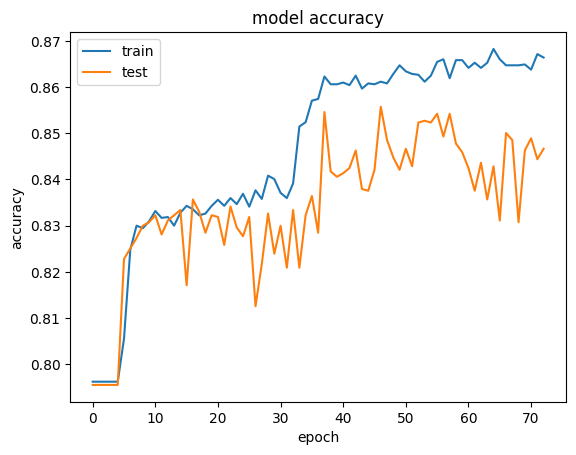

In [68]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

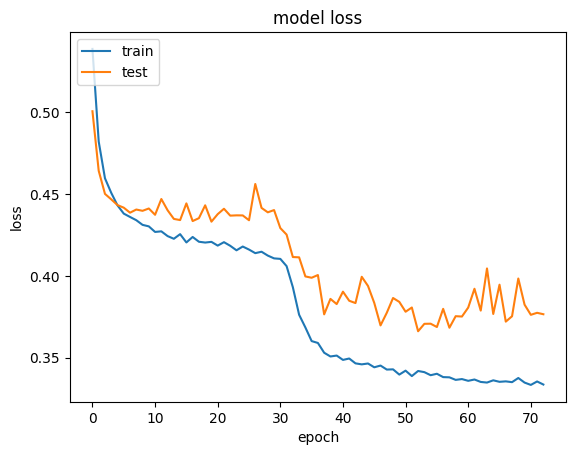

In [69]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [70]:
#part 3= Making the predictions and evaluting the model
#predicting the test set result
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [72]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1447,  148],
       [ 156,  249]])

In [73]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.848

In [74]:
#get the weights
classifier.get_weights()

[array([[-0.02927186,  0.05386596, -0.19698769, -0.04762464,  0.2564867 ,
          0.28216732, -0.52066034, -0.01343671,  0.22229792,  0.01211999,
         -0.04937803],
        [-1.0863086 ,  0.22658281, -0.6032941 , -0.228242  ,  0.40435842,
         -1.1490264 , -0.7599757 ,  0.71135235, -0.5548226 ,  0.37418008,
         -0.52335   ],
        [-0.0102637 ,  0.22813733,  0.07146151,  0.04730388,  0.176266  ,
         -0.09870075,  0.36001956,  0.17514503,  0.10395055,  0.17027941,
          0.04158538],
        [-0.06235691,  0.00685011,  0.24939974,  0.76078   ,  0.7504342 ,
         -0.41441217,  0.03431201,  0.14724764, -0.06168713,  0.17584158,
          0.19929671],
        [ 0.22234458,  0.11258202, -0.55079436, -0.97216284,  0.57743263,
          0.12885284,  1.1860406 ,  1.5076421 ,  0.2365732 ,  0.7013736 ,
          1.9196454 ],
        [ 0.01877803,  0.11463971,  0.02946749, -0.10764988, -0.09965922,
          0.3996561 ,  0.17306288, -0.03645625, -0.63209665, -0.0749444